In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import random
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, boxcox

In [2]:
def readDataSetLexical(nrows = None):
    ## read data
    train = pd.read_csv('data/train.csv', nrows = None)
    test = pd.read_csv('data/test.csv', nrows = None)

    numeric_feats = [x for x in train.columns[1:-1] if 'cont' in x]
    cats = [x for x in train.columns[1:-1] if 'cat' in x]
    train_test, ntrain = mungeskewed(train, test, numeric_feats)
    for col in cats:
        train_test[col] = train_test[col].apply(encode)

    ss = StandardScaler()
    train_test[numeric_feats] = \
        ss.fit_transform(train_test[numeric_feats].values)
    train = train_test.iloc[:ntrain, :].copy()
    test = train_test.iloc[ntrain:, :].copy()
    test.drop('loss', inplace=True, axis=1)
    feats = numeric_feats+ cats

    return train[feats], test[feats], train['id'], test['id'], train["loss"]

def mungeskewed(train, test, numeric_feats):
    ntrain = train.shape[0]
    test['loss'] = 0
    train_test = pd.concat((train, test)).reset_index(drop=True)
    # compute skew and do Box-Cox transformation (Tilli)
    skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))
    print("\nSkew in numeric features:")
    print(skewed_feats)
    skewed_feats = skewed_feats[skewed_feats > 0.25]
    skewed_feats = skewed_feats.index

    for feats in skewed_feats:
        train_test[feats] = train_test[feats] + 1
        train_test[feats], lam = boxcox(train_test[feats])
    return train_test, ntrain

def encode(charcode):
    r = 0
    ln = len(charcode)
    if(ln > 2):
        print("Error: Expected Maximum of Two Characters!")
        exit(0)
    for i in range(ln):
        r += (ord(charcode[i])-ord('A')+1)*26**(ln-i-1)
    return r


In [3]:
train, test, trainid, testid, trainloss = readDataSetLexical()


Skew in numeric features:
cont1     0.516420
cont2    -0.310939
cont3    -0.010002
cont4     0.416093
cont5     0.681617
cont6     0.461211
cont7     0.826046
cont8     0.676629
cont9     1.072420
cont10    0.354998
cont11    0.280819
cont12    0.291990
cont13    0.380739
cont14    0.248672
dtype: float64


In [4]:
def list_to_percentiles(numbers):
    pairs = zip(numbers, range(len(numbers)))
    pairs.sort(key=lambda p: p[0])
    result = [0 for i in range(len(numbers))]
    for rank in xrange(len(numbers)):
        original_index = pairs[rank][1]
        result[original_index] = int( rank * 100.0 / (len(numbers)-1))
    return result

In [32]:
losslg = np.log(trainloss+200)

In [33]:
losslgqt = list_to_percentiles(losslg)

In [34]:
%matplotlib inline 
import matplotlib.pyplot as plt 

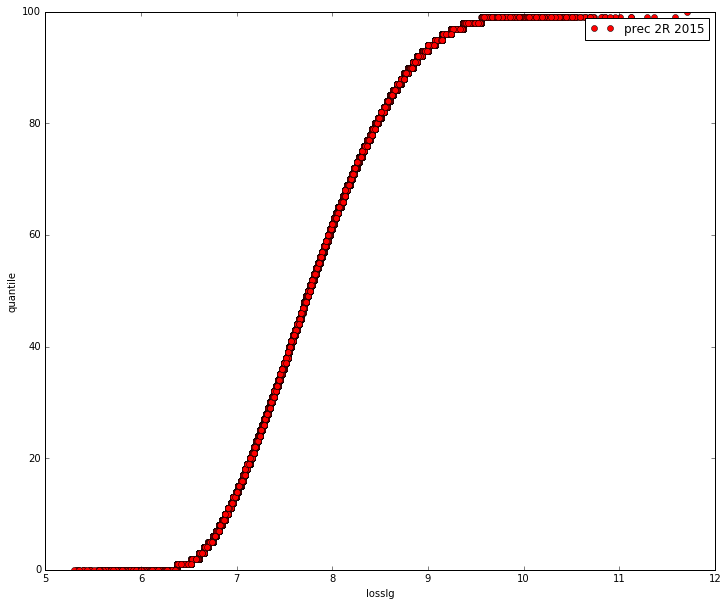

In [35]:
plt.figure(figsize=(12, 10)) 

plt.plot(losslg, losslgqt, 'o' , label="", color = "red") 


plt.xlabel('losslg')
plt.ylabel('quantile')
plt.legend(loc="upper right")
plt.show()

In [36]:
from sklearn.cross_validation import StratifiedKFold

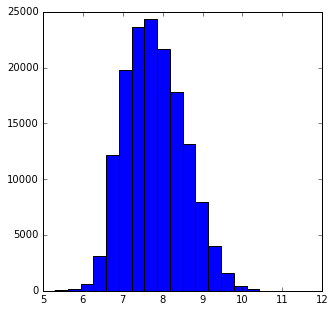

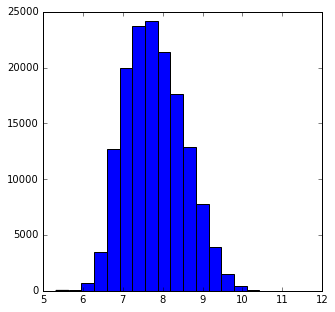

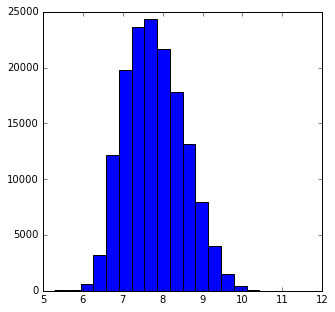

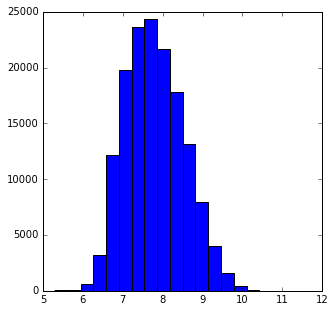

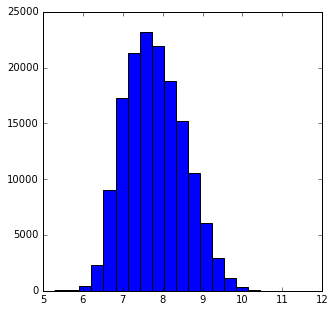

In [43]:
skf = StratifiedKFold(losslgqt, n_folds=5, shuffle = True, random_state = 20)


for trainidx, testidx in skf:
    plt.figure(figsize=(5, 5)) 
    plt.hist(losslg[trainidx], bins = 20)
    plt.show()

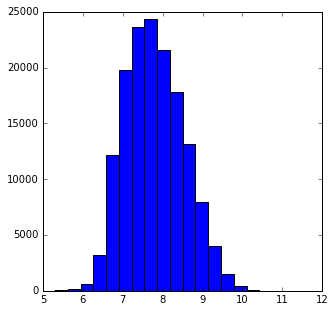

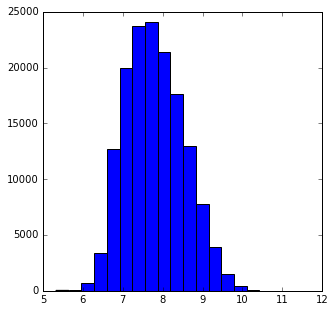

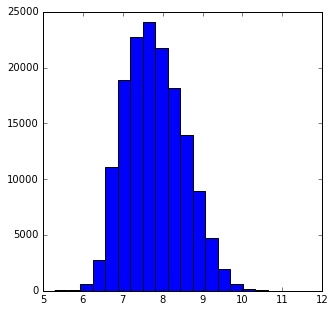

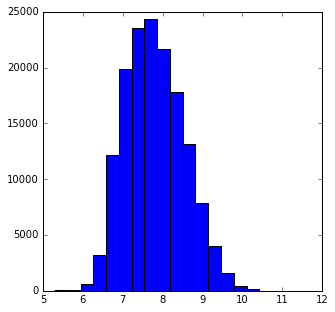

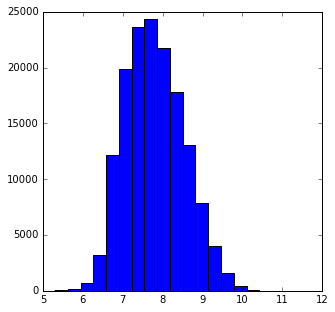

In [42]:
from sklearn.cross_validation import KFold
folds = KFold(len(losslg), n_folds = 5, shuffle = True, random_state = 111)
for (inTr, inTe) in folds:
    plt.figure(figsize=(5, 5)) 
    plt.hist(losslg[inTr], bins = 20)
    plt.show()